# DEPARTAMENTO DE INGENIERÍA EN SISTEMAS DE INFORMACIÓN 
### **Inteligencia Artificial**  
### 5k2 - 2do Cuatrimestre 2025 


### Integrantes Grupo N° 2
- **Bordino Coniglio, Tobías Martín** — *93611*  
- **Caffaro, Santiago** — *90364*  
- **Moreno, Tomás Agustín** — *90365*  
- **Suarez, Emiliano Fabricio** — *91134*

# Exploración del Dataset

#### Configuración Inicial

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm 
from PIL import Image 

# Ruta a las imágenes
image_dir = '/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/JPEGImages'

# Listar imágenes .jpg
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
print(f"Total de imágenes: {len(image_files)}")


Total de imágenes: 17125


## Estadísticas básicas
---
Se agregan al DataFrame las columnas necesarias para analizar y describir cuantitativamente las características de cada imagen del conjunto de datos. Estas columnas son:

* **filename**: corresponde al nombre del archivo de imagen y permite identificar de manera única cada imagen.

* **width**: representa el ancho de la imagen en píxeles, es decir, el número de columnas que contiene la matriz de píxeles.

* **height**: indica el alto de la imagen, expresado en número de filas dentro de la matriz de píxeles.

* **channels**: hace referencia al número de canales de color que posee cada imagen, normalmente tres en el caso de imágenes RGB (rojo, verde y azul).

* **size_kb**: muestra el tamaño del archivo en kilobytes (KB), lo que permite conocer cuánto espacio ocupa cada imagen en el disco.

In [2]:
image_data = []

for f in tqdm(image_files, desc="Analizando imágenes"):  
    path = os.path.join(image_dir, f)
    img = cv2.imread(path)
    if img is None:
        continue
    h, w, c = img.shape
    size_kb = os.path.getsize(path) / 1024
    image_data.append([f, w, h, c, size_kb])

df = pd.DataFrame(image_data, columns=['filename', 'width', 'height', 'channels', 'size_kb'])
df.head()

Analizando imágenes: 100%|██████████| 17125/17125 [03:16<00:00, 87.31it/s]


filename  width  height  channels     size_kb
0  2007_005304.jpg    500     400         3   69.343750
1  2009_002094.jpg    500     375         3  120.733398
2  2011_006475.jpg    500     375         3  158.150391
3  2011_000611.jpg    500     375         3  131.470703
4  2009_004042.jpg    500     375         3  147.988281

### Resumen estadístico 

In [3]:
print("Cantidad total de imágenes:", len(df))
print(df[['width', 'height', 'size_kb']].describe())

Cantidad total de imágenes: 17125
              width        height       size_kb
count  17125.000000  17125.000000  17125.000000
mean     466.797547    389.507620    109.604073
std       61.931367     65.497125     45.656307
min      142.000000     71.000000      7.147461
25%      499.000000    338.000000     77.677734
50%      500.000000    375.000000    109.863281
75%      500.000000    400.000000    138.762695
max      500.000000    500.000000    835.206055


El conjunto de datos contiene un total de 17,125 imágenes, con dimensiones relativamente homogéneas. La mayoría de las imágenes tienen un ancho cercano a 500 píxeles (la mediana y los cuartiles están prácticamente en ese valor), mientras que la altura promedio es de unos 390 píxeles, mostrando algo más de variabilidad. Esto sugiere que las imágenes fueron probablemente redimensionadas o generadas bajo un formato estándar, donde el ancho se mantiene fijo y el alto varía ligeramente según la proporción original. En cuanto al tamaño en disco, las imágenes tienen un peso promedio de alrededor de 110 KB, aunque con una dispersión considerable: algunas ocupan apenas 7 KB y otras superan los 800 KB. Esta variabilidad en el tamaño puede deberse a diferencias en el contenido visual, el nivel de detalle, o el grado de compresión utilizado.

## Visualizaciones relevantes
---

### Gráfico de dispersión

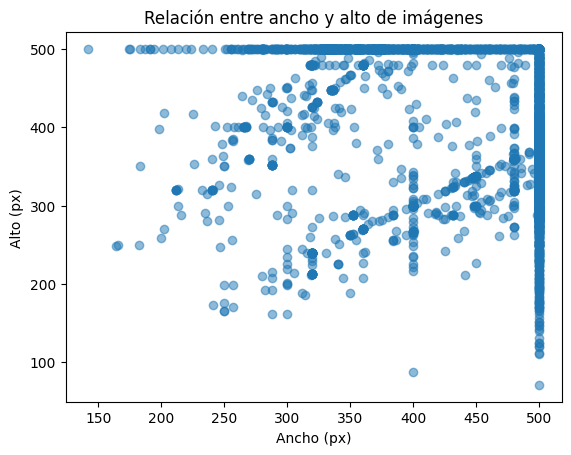

In [4]:
# Gráfico 
plt.scatter(df['width'], df['height'], alpha=0.5)
plt.xlabel('Ancho (px)')
plt.ylabel('Alto (px)')
plt.title('Relación entre ancho y alto de imágenes')
plt.show()

### Histograma

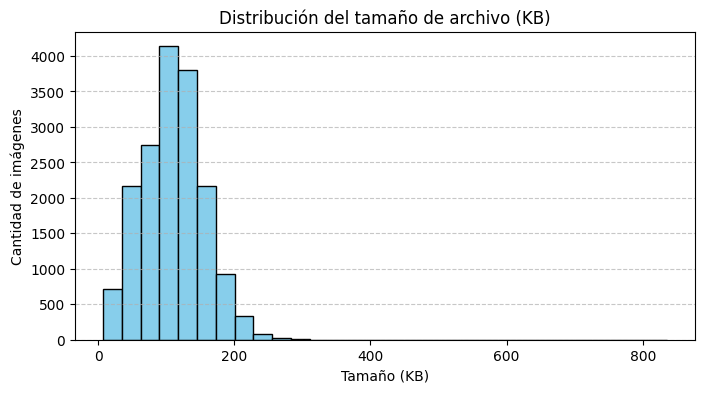

In [5]:
# Gráfico
plt.figure(figsize=(8,4))
plt.hist(df['size_kb'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del tamaño de archivo (KB)')
plt.xlabel('Tamaño (KB)')
plt.ylabel('Cantidad de imágenes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Distribución por clases
---

In [6]:
import os
import xml.etree.ElementTree as ET
from collections import Counter
from tqdm import tqdm
import pandas as pd

# Directorio de anotaciones
annotations_dir = '/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/Annotations'
class_counts = Counter()

# Recorrer todos los archivos XML y contar las clases
for xml_file in tqdm(os.listdir(annotations_dir), desc="Analizando anotaciones"):
    if not xml_file.endswith('.xml'):
        continue
    tree = ET.parse(os.path.join(annotations_dir, xml_file))
    root = tree.getroot()
    for obj in root.findall('object'):
        cls = obj.find('name').text
        class_counts[cls] += 1

# Convertir a DataFrame
classes_df = pd.DataFrame(class_counts.items(), columns=['class', 'count']).sort_values(by='count', ascending=False)

# Mostrar todas las clases
pd.set_option('display.max_rows', None)
print(classes_df)

Analizando anotaciones: 100%|██████████| 17125/17125 [01:18<00:00, 219.01it/s]

          class  count
0        person  17401
14        chair   3056
7           car   2492
8           dog   1598
2        bottle   1561
4           cat   1277
17         bird   1271
5   pottedplant   1202
19        sheep   1084
18         boat   1059
11    aeroplane   1002
3     tvmonitor    893
1          sofa    841
10      bicycle    837
6         horse    803
13    motorbike    801
12  diningtable    800
15          cow    771
9         train    704
16          bus    685


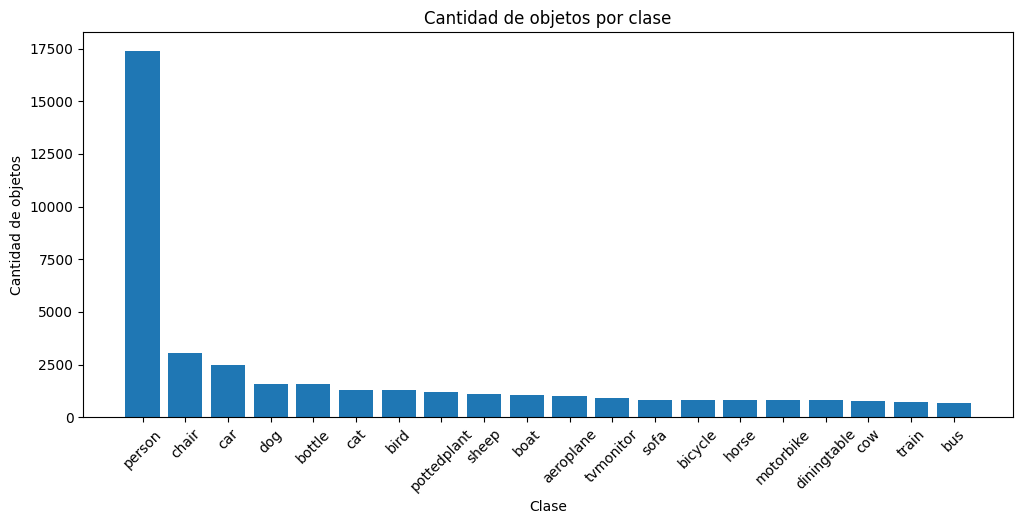

In [7]:
# Gráfico
plt.figure(figsize=(12,5))
plt.bar(classes_df['class'], classes_df['count'])
plt.xticks(rotation=45)
plt.title('Cantidad de objetos por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de objetos')
plt.show()

## Clustering exploratorio
---
El objetivo acá es agrupar imágenes similares sin usar sus etiquetas, basándonos en sus características visuales.


In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Calculando histogramas: 100%|██████████| 17125/17125 [01:01<00:00, 276.71it/s]


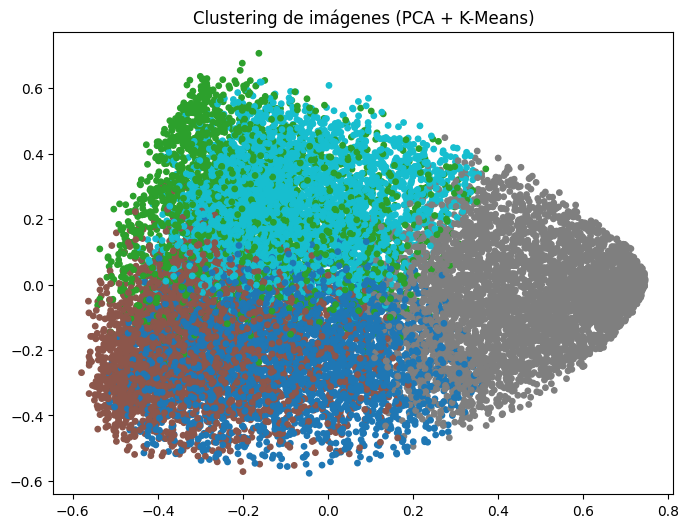

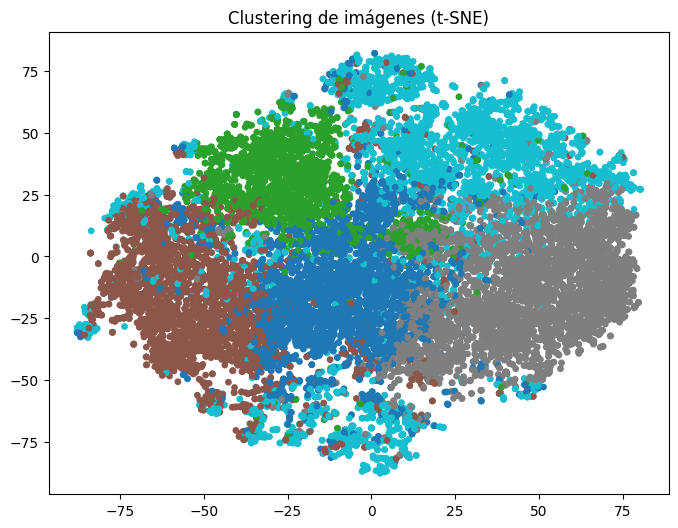

In [9]:
embeddings = []

for f in tqdm(image_files, desc="Calculando histogramas"):
    path = os.path.join(image_dir, f)
    img = cv2.imread(path)
    if img is None:
        continue
    img = cv2.resize(img, (128,128))
    hist = cv2.calcHist([img], [0,1,2], None, [8,8,8], [0,256,0,256,0,256])
    hist = cv2.normalize(hist, hist).flatten()
    embeddings.append(hist)

embeddings = np.array(embeddings)

# K-Means clustering
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
labels = kmeans.fit_predict(embeddings)

# Reducción 1
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='tab10', s=15)
plt.title("Clustering de imágenes (PCA + K-Means)")
plt.show()

# Reducción 2
reduced_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(reduced_tsne[:,0], reduced_tsne[:,1], c=labels, cmap='tab10', s=15)
plt.title("Clustering de imágenes (t-SNE)")
plt.show()


# Generación de Embeddings

#### Instalación de Librerías

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

In [11]:
import torch 
import clip
from PIL import Image
import os
from tqdm import tqdm
import numpy as np

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#### Generación de Embeddings con CLIP

Se fija una semilla aleatoria para asegurar reproducibilidad, se carga el modelo CLIP (ViT-B/32) usando GPU si está disponible y se obtienen las imágenes del dataset Pascal VOC 2012 ordenadas para su procesamiento:

In [12]:
np.random.seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
print(f"Modelo CLIP cargado en: {device}")

image_dir = '/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/JPEGImages'
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 65.5MiB/s]


Modelo CLIP cargado en: cuda


Se generan los embeddings de las imágenes usando el modelo CLIP. Se procesan en lotes de 64 imágenes para optimizar memoria, desactivando el cálculo de gradientes con torch.no_grad() para acelerar la inferencia. Cada imagen se abre, convierte a RGB y se preprocesa, omitiendo las que estén dañadas. Luego, el modelo calcula sus vectores de características (embeddings), que se almacenan y finalmente se guardan en un archivo .npy para su uso posterior:

In [13]:
embeddings_list = []
batch_size = 64

with torch.no_grad():
    for i in tqdm(range(0, len(image_files), batch_size), desc="Generando embeddings globales con CLIP..."):
        batch_files = image_files[i:i+batch_size]
        images = []
        for f in batch_files:
            path = os.path.join(image_dir, f)
            try:
                img = Image.open(path).convert("RGB")
                images.append(preprocess(img).unsqueeze(0))
            except Exception as e:
                continue
        
        if not images:
            continue

        image_batch = torch.cat(images).to(device)
        image_features = model.encode_image(image_batch)
        embeddings_list.append(image_features.cpu().numpy())

embeddings = np.vstack(embeddings_list)
np.save('image_embeddings.npy', embeddings)

print(f"\n Embeddings generados y guardados con éxito en: image_embeddings.npy")
print(f"Dimensiones del array de embeddings: {embeddings.shape}")

Generando embeddings globales con CLIP...: 100%|██████████| 268/268 [02:17<00:00,  1.95it/s]


 Embeddings generados y guardados con éxito en: image_embeddings.npy
Dimensiones del array de embeddings: (17125, 512)


#### Clustering y Visualización con K-Means t-SNE.

Se cargan los embeddings guardados y se aplica t-SNE para reducir su dimensionalidad y poder visualizarlos en 2D. Luego, se realiza un clustering con K-Means para agrupar las imágenes en 20 clusters según su similitud. Finalmente, se genera un gráfico que muestra la distribución de las imágenes en el espacio reducido, coloreadas según el grupo al que pertenecen:

Cargando los embeddings guardados...
Realizando reducción de dimensionalidad con t-SNE (esto puede tardar un par de minutos)...
Realizando clustering con K-Means...
Generando el gráfico de clustering...


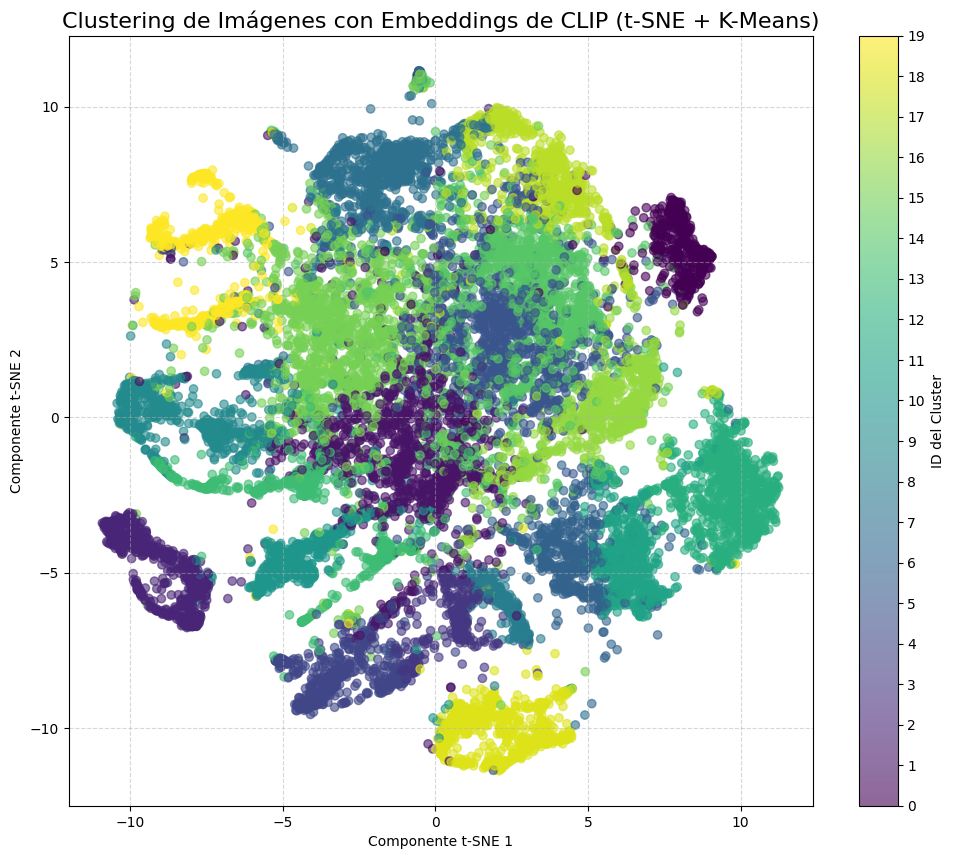

In [14]:
print("Cargando los embeddings guardados...")
embeddings = np.load('image_embeddings.npy')

print("Realizando reducción de dimensionalidad con t-SNE (esto puede tardar un par de minutos)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300, init='pca', n_jobs=-1)
embeddings_2d = tsne.fit_transform(embeddings)

print("Realizando clustering con K-Means...")
kmeans = KMeans(n_clusters=20, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(embeddings)

print("Generando el gráfico de clustering...")
plt.figure(figsize=(12, 10))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Clustering de Imágenes con Embeddings de CLIP (t-SNE + K-Means)', fontsize=16)
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.colorbar(scatter, ticks=range(20), label='ID del Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Búsqueda, Reformulación y Reranking

#### Instalación librería FAISS

In [15]:
!pip install -q faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 58.0 MB/s eta 0:00:00:00:0100:01


In [16]:
import faiss
import torch

#### Carga y preparación de los embeddings para usarlos con FAISS

Se cargan los embeddings guardados y se preparan para su uso en FAISS. Luego, se aplica una normalización L2 para que todos los vectores tengan la misma magnitud:

In [17]:
print("Cargando los embeddings guardados...")
embeddings = np.load('image_embeddings.npy')

embeddings = np.asarray(embeddings, dtype=np.float32)     
embeddings = np.ascontiguousarray(embeddings)             
if not embeddings.flags['WRITEABLE']:
    embeddings = embeddings.copy()                        

faiss.normalize_L2(embeddings)
print("Embeddings normalizados correctamente:", embeddings.shape)


Cargando los embeddings guardados...
Embeddings normalizados correctamente: (17125, 512)


## Buscador Baseline

Se crea un índice FAISS utilizando producto interno (cosine similarity) para almacenar los embeddings normalizados y realizar búsquedas eficientes por similitud. Luego, se recarga el modelo CLIP (ViT-B/32) y se prepara la lista de imágenes del dataset Pascal VOC 2012, ordenadas para su posterior uso en consultas o visualizaciones:

In [18]:
dimension = embeddings.shape[1]  
index = faiss.IndexFlatIP(dimension)  
index.add(embeddings)
print(f"Índice FAISS creado con {index.ntotal} vectores.")


device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


image_dir = '/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/JPEGImages'
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

Índice FAISS creado con 17125 vectores.


Se define una función de búsqueda básica (search_baseline) que convierte una consulta textual en un embedding, busca las imágenes más similares en el índice FAISS y devuelve los nombres de archivo correspondientes a los resultados más cercanos:

In [19]:
def search_baseline(query_text, top_k=10):
    with torch.no_grad():
        text_inputs = clip.tokenize([query_text]).to(device)
        text_features = model.encode_text(text_inputs)
        
        text_features /= text_features.norm(dim=-1, keepdim=True)
    
    query_embedding = text_features.cpu().numpy()
    
    # Buscamos en el índice FAISS los top_k vectores más similares
    distances, indices = index.search(query_embedding, top_k)

    return [image_files[i] for i in indices[0]]

#### Ejemplo de búsqueda

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Función para visualizar los resultados
def plot_results(results, query, top_k=10):
    plt.figure(figsize=(20, 5))
    plt.suptitle(f"Resultados para: '{query}'", fontsize=20)
    for i, filename in enumerate(results[:top_k]):
        path = os.path.join(image_dir, filename)
        try:
            img = Image.open(path)
            plt.subplot(1, top_k, i+1)
            plt.imshow(img)
            plt.title(f"{i+1}. {filename}")
            plt.axis('off')
        except Exception as e:
            print(f"No se pudo cargar la imagen {filename}: {e}")
            continue
    plt.show()

--- Ejecutando Baseline para: 'a dog playing' ---


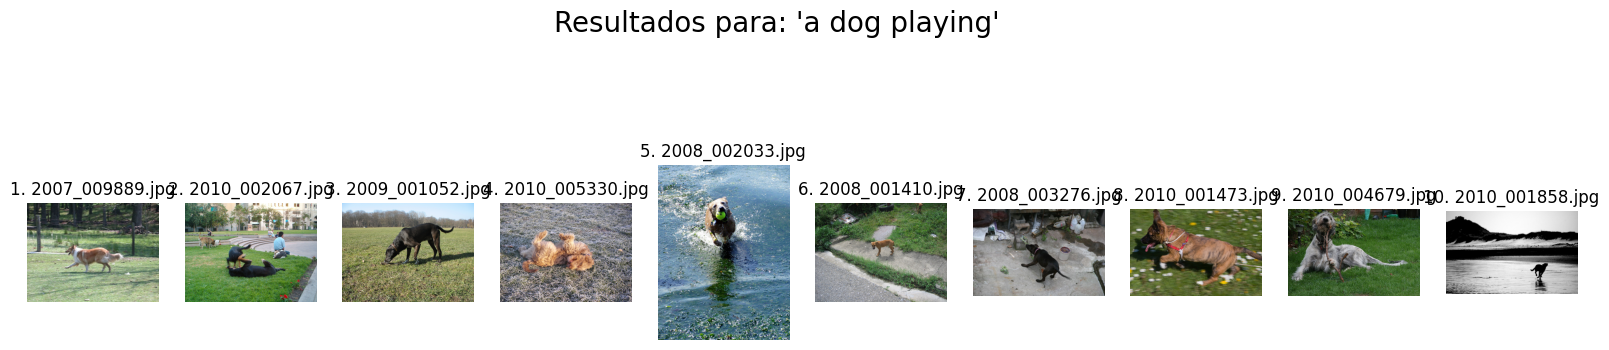


--- Ejecutando Baseline para: 'a person on a bicycle' ---


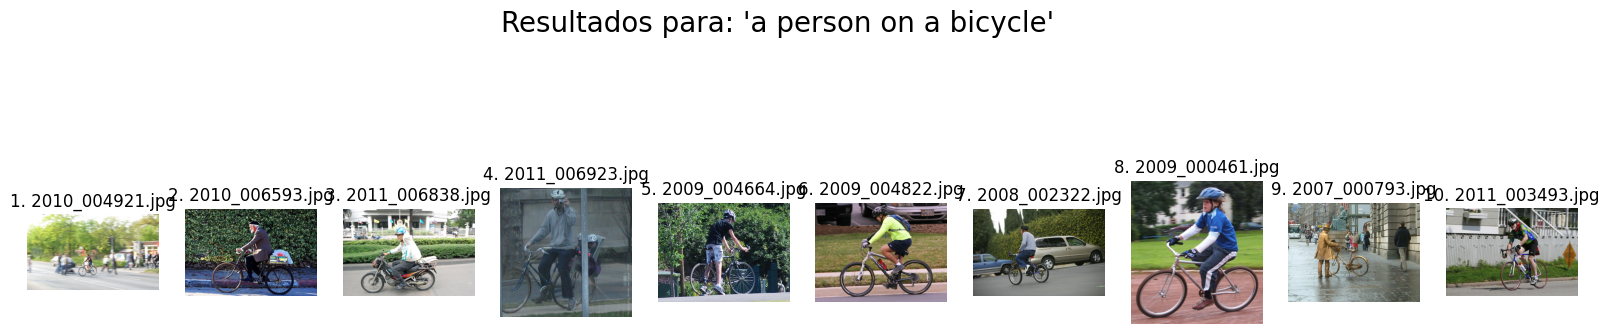

In [21]:
# Búsqueda 1: Un objeto simple
query1 = "a dog playing"
print(f"--- Ejecutando Baseline para: '{query1}' ---")
baseline_results1 = search_baseline(query1)
plot_results(baseline_results1, query1)

# Búsqueda 2: Un objeto más específico
query2 = "a person on a bicycle"
print(f"\n--- Ejecutando Baseline para: '{query2}' ---")
baseline_results2 = search_baseline(query2)
plot_results(baseline_results2, query2)

## Implementación de LLM

#### Traducción con Helsinki y Reformulación con TinyLlama

Se carga un modelo de traducción de español a inglés utilizando Helsinki-NLP, que es liviano y eficiente para tareas de traducción automática. Además, se define el nombre del modelo de lenguaje TinyLlama (1.1B Chat) que se utilizará más adelante para el análisis de texto:

In [ ]:
!pip install -q sentencepiece transformers accelerate

In [ ]:
import torch
from transformers import pipeline
import json

In [24]:
translator = pipeline("translation_es_to_en", model="Helsinki-NLP/opus-mt-es-en")
print("Traductor cargado.")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


Traductor cargado.


In [25]:
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
print(f"Cargando el pipeline para el modelo '{model_name}'...")

llm_pipeline = pipeline(
    "text-generation",
    model=model_name,
    torch_dtype=torch.bfloat16, 
    device_map="auto"
)
print("LLM TinyLlama cargado con éxito.")

Cargando el pipeline para el modelo 'TinyLlama/TinyLlama-1.1B-Chat-v1.0'...


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Device set to use cuda:0


LLM TinyLlama cargado con éxito.


### Funciones para la reformulación

1. Función para extraer un bloque JSON de texto generado por un modelo de lenguaje y corregimos para convertirlo en un JSON válido en Python.

In [26]:
import json, re

def _extract_and_fix_json(s: str) -> dict:
    m = re.search(r"\{.*\}", s, flags=re.S)
    if not m:
        raise ValueError("No JSON object found")
    j = m.group(0)

    j = j.replace("“", '"').replace("”", '"').replace("’", "'")
    if re.search(r"[{,\s]'", j):
        j = re.sub(r"(?P<pre>[{,\s])'(.*?)'(?P<post>[\s,}])",
                   lambda m: f'{m.group("pre")}"{m.group(2)}"{m.group("post")}', j)
    j = re.sub(r",(\s*[}\]])", r"\1", j)

    data = json.loads(j)
    if not isinstance(data, dict):
        raise ValueError("Parsed JSON is not an object")
    return data


2. Función para detectar si una frase contiene una negación y separar el término principal (main_term) del término negado (negative_term).

In [27]:
def _detect_negation_pair(text: str):
    t = " " + text.strip() + " "
    tl = t.lower()

    # non-red / non red
    m = re.search(r"\bnon[-\s]+([a-z0-9\-]+)\b", tl)
    if m:
        neg = m.group(1).strip()
        main = re.sub(r"\bnon[-\s]+" + re.escape(neg) + r"\b", "", t, flags=re.I).strip()
        return (re.sub(r"\s+", " ", main), neg, True)

    # not X
    m = re.search(r"\bnot\s+([a-z0-9\-]+)\b", tl)
    if m:
        neg = m.group(1).strip()
        main = re.sub(r"\bnot\s+" + re.escape(neg) + r"\b", "", t, flags=re.I).strip()
        return (re.sub(r"\s+", " ", main), neg, True)

    # without/except X
    m = re.search(r"\b(without|except)\s+([a-z0-9\-]+)\b", tl)
    if m:
        neg = m.group(2).strip()
        main = re.sub(r"\b(without|except)\s+" + re.escape(neg) + r"\b", "", t, flags=re.I).strip()
        return (re.sub(r"\s+", " ", main), neg, True)

    # ES: no X
    m = re.search(r"\bno\s+([a-záéíóúñ0-9\-]+)\b", tl)
    if m:
        neg = m.group(1).strip()
        main = re.sub(r"\bno\s+" + re.escape(neg) + r"\b", "", t, flags=re.I).strip()
        return (re.sub(r"\s+", " ", main), neg, True)

    # ES: sin X
    m = re.search(r"\bsin\s+([a-záéíóúñ0-9\-]+)\b", tl)
    if m:
        neg = m.group(1).strip()
        main = re.sub(r"\bsin\s+" + re.escape(neg) + r"\b", "", t, flags=re.I).strip()
        return (re.sub(r"\s+", " ", main), neg, True)

    # Sin pistas de negación
    return (text.strip(), "", False)

3. Función para tomar una consulta en texto libre (en español o inglés), detectamos si hay negaciones y generamos un JSON normalizado con los campos: "main_term" y "negative_term".

In [28]:
def reformulate_query_pipeline(query_text):
    # Paso A: detección previa (ES)
    pre_main, pre_neg, pre_has_neg = _detect_negation_pair(query_text)

    # Paso 1: traducción
    translated_text = translator(query_text)[0]['translation_text']

    # Paso B: detección posterior (EN)
    post_main, post_neg, post_has_neg = _detect_negation_pair(translated_text)

    # Fusión simple
    det_main = post_main if post_main else pre_main
    det_neg  = post_neg  if post_has_neg else (pre_neg if pre_has_neg else "")
    has_neg  = post_has_neg or pre_has_neg

    # Paso 2: TinyLlama
    system = (
            "You convert an English search query into a JSON object.\n"
            "- Return EXACTLY one JSON object with keys: main_term and negative_term.\n"
            "- main_term must be the original user query text verbatim (in English).\n"
            "- If there is a negation (e.g., 'a non-X Y' or 'Y not X'), negative_term is 'X'; otherwise empty string.\n"
            "- Do not invent content; do not add any text before or after the JSON."
        )
    
    prompt = f"<|system|>\n{system}\n</s>\n<|user|>\n{translated_text}\n</s>\n<|assistant|>\n"

    try:
        sequences = llm_pipeline(
            prompt,
            max_new_tokens=80,
            do_sample=False,
            num_return_sequences=1,
            return_full_text=False
        )
        raw = sequences[0]['generated_text']
        data = _extract_and_fix_json(raw)

        main_term = str(data.get("main_term", "")).strip()
        negative_term = str(data.get("negative_term", "")).strip()


        if not has_neg:
            negative_term = ""


        if not main_term:
            main_term = det_main

        if has_neg and not negative_term:
            negative_term = det_neg

        reformulated = {"main_term": main_term, "negative_term": negative_term}

    except Exception:
        # Fallback
        reformulated = {"main_term": det_main, "negative_term": det_neg if has_neg else ""}

    return reformulated

#### Ejemplos de reformulación

In [29]:
# Ejemplo 1: 
query_es = "un perro no negro en la playa"
reformulated_es = reformulate_query_pipeline(query_es)
print(f"Consulta original: '{query_es}'")
print("Reformulada:", reformulated_es, "\n")

# Ejemplo 2: 
query_neg = "gato y perro"
reformulated_neg = reformulate_query_pipeline(query_neg)
print(f"Consulta original: '{query_neg}'")
print("Reformulada:", reformulated_neg)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta original: 'un perro no negro en la playa'
Reformulada: {'main_term': 'a dog on the beach', 'negative_term': 'black'} 

Consulta original: 'gato y perro'
Reformulada: {'main_term': 'cat and dog', 'negative_term': ''}


## Reranking

Esta función realiza una búsqueda avanzada de imágenes combinando reformulación de consultas, embeddings y reranking. Primero, usa la función anterior para reformular la consulta y detectar posibles términos negados. Luego, busca imágenes relacionadas con el término principal y, si existe una negación, aplica un reranking penalizando las imágenes que se asemejen al término negativo. Para ello, compara los embeddings del texto y las imágenes con el modelo CLIP y ajusta los puntajes usando un factor de penalización (lambda_neg). Finalmente, devuelve las imágenes más relevantes según la búsqueda refinada.

In [30]:
def search_advanced(query_text, top_k=10, recall_multiplier=5, lambda_neg=0.8):
    reformulated = reformulate_query_pipeline(query_text)
    main_term = reformulated['main_term']
    negative_term = reformulated['negative_term']
    
    initial_filenames = search_baseline(main_term, top_k * recall_multiplier)
    
    if not negative_term:
        print("Consulta sin negación, devolviendo resultados directos.")
        return initial_filenames[:top_k]

    print(f"Aplicando reranking: penalizando el término '{negative_term}'")
    
    with torch.no_grad():
        main_features = model.encode_text(clip.tokenize([main_term]).to(device))
        main_features /= main_features.norm(dim=-1, keepdim=True)
        
        neg_features = model.encode_text(clip.tokenize([negative_term]).to(device))
        neg_features /= neg_features.norm(dim=-1, keepdim=True)

    reranked_scores = {}
    for filename in initial_filenames:
        idx = image_files.index(filename)
        
        img_embedding_norm = torch.tensor(embeddings[idx]).unsqueeze(0).to(device).to(main_features.dtype)
        
        score_main = torch.matmul(img_embedding_norm, main_features.T).item()
        score_negative = torch.matmul(img_embedding_norm, neg_features.T).item()
        
        final_score = score_main - (lambda_neg * score_negative)
        reranked_scores[filename] = final_score

    sorted_results = sorted(reranked_scores.items(), key=lambda item: item[1], reverse=True)
    
    return [filename for filename, score in sorted_results[:top_k]]

# Comparación

--- Ejecutando Baseline para: 'auto no rojo' ---


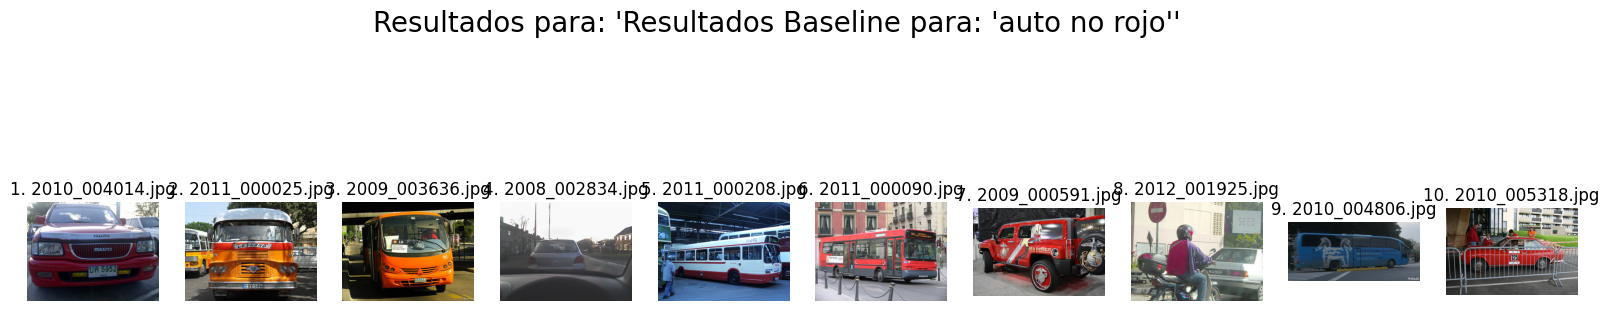

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



--- Ejecutando Búsqueda Avanzada para: 'auto no rojo' ---
Aplicando reranking: penalizando el término 'red'


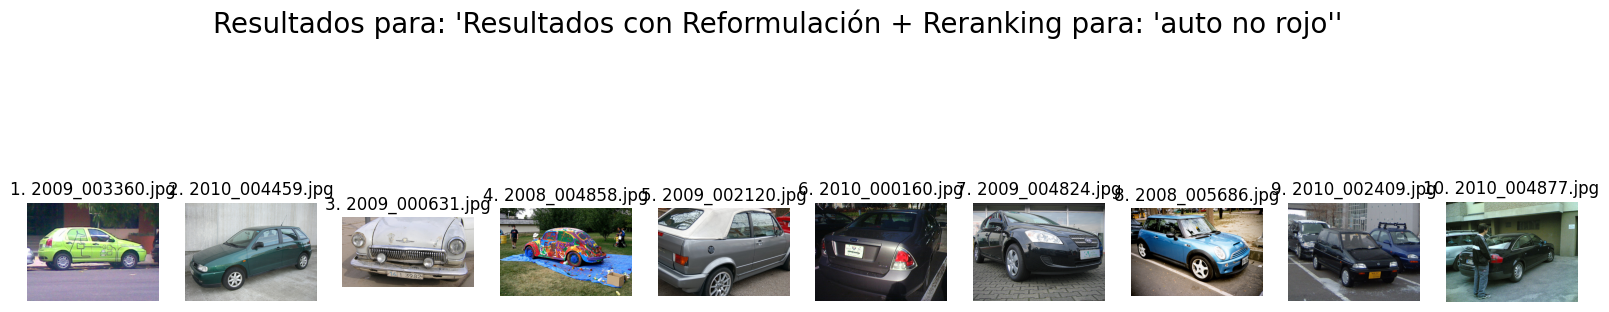

In [46]:
# Ejemplo 1
query_complex = "auto no rojo"

# Búsqueda Baseline
print(f"--- Ejecutando Baseline para: '{query_complex}' ---")
baseline_results = search_baseline(query_complex)
plot_results(baseline_results, f"Resultados Baseline para: '{query_complex}'")

# Búsqueda Avanzada 
print(f"\n--- Ejecutando Búsqueda Avanzada para: '{query_complex}' ---")
advanced_results = search_advanced(query_complex)
plot_results(advanced_results, f"Resultados con Reformulación + Reranking para: '{query_complex}'")

--- Ejecutando Baseline para: 'perro no negro' ---


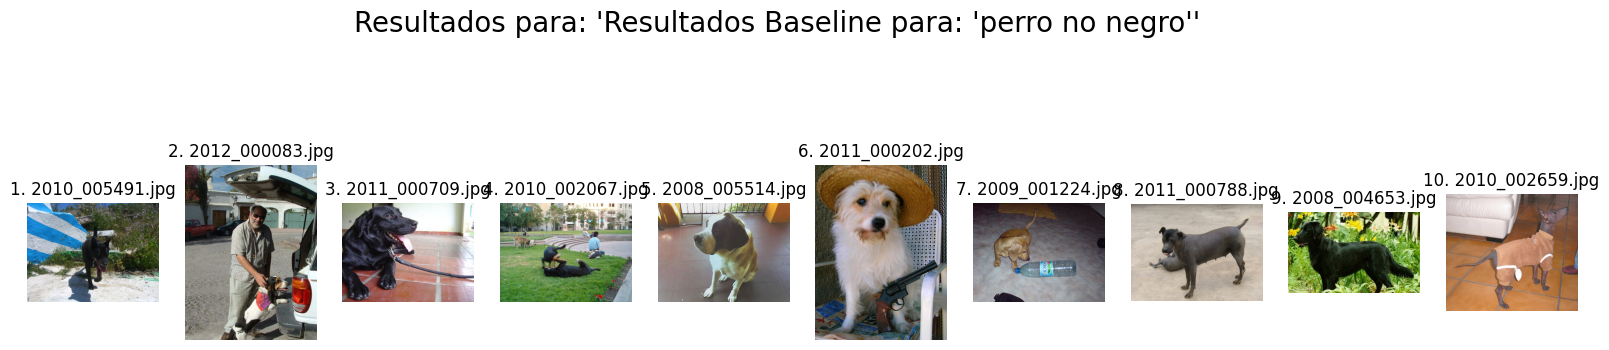

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



--- Ejecutando Búsqueda Avanzada para: 'perro no negro' ---
Aplicando reranking: penalizando el término 'black'


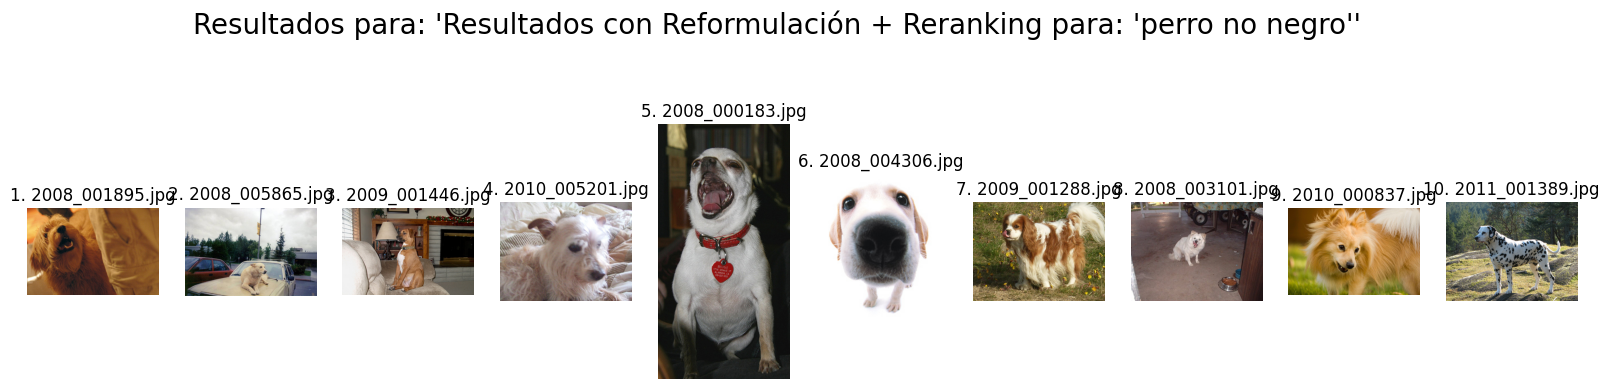

In [106]:
# Ejemplo 2
query_complex = "perro no negro"

# Búsqueda Baseline
print(f"--- Ejecutando Baseline para: '{query_complex}' ---")
baseline_results = search_baseline(query_complex)
plot_results(baseline_results, f"Resultados Baseline para: '{query_complex}'")

# Búsqueda Avanzada (con reformulación y reranking)
print(f"\n--- Ejecutando Búsqueda Avanzada para: '{query_complex}' ---")
advanced_results = search_advanced(query_complex)
plot_results(advanced_results, f"Resultados con Reformulación + Reranking para: '{query_complex}'")

--- Ejecutando Baseline para: 'moto sin persona' ---


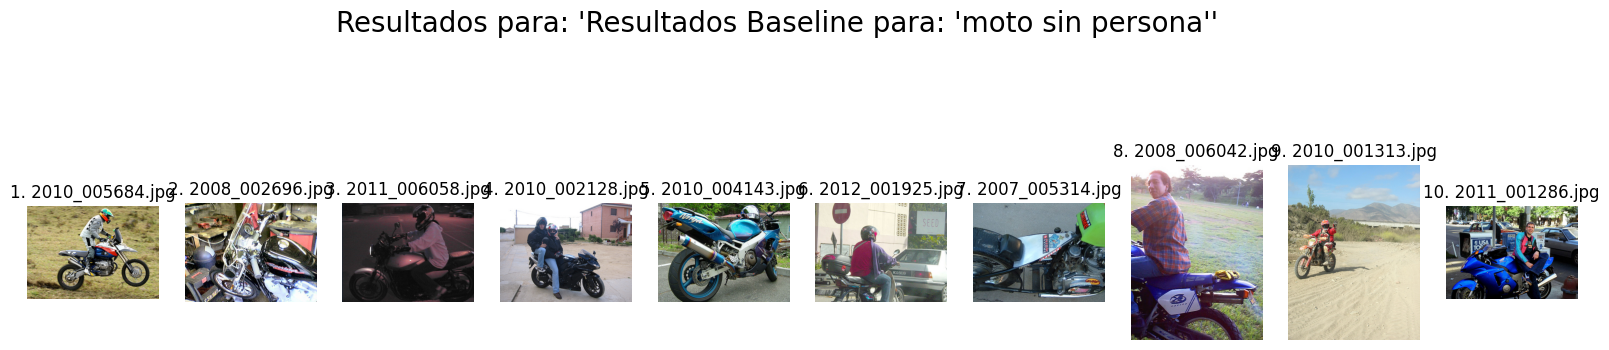

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



--- Ejecutando Búsqueda Avanzada para: 'moto sin persona' ---
Aplicando reranking: penalizando el término 'person'


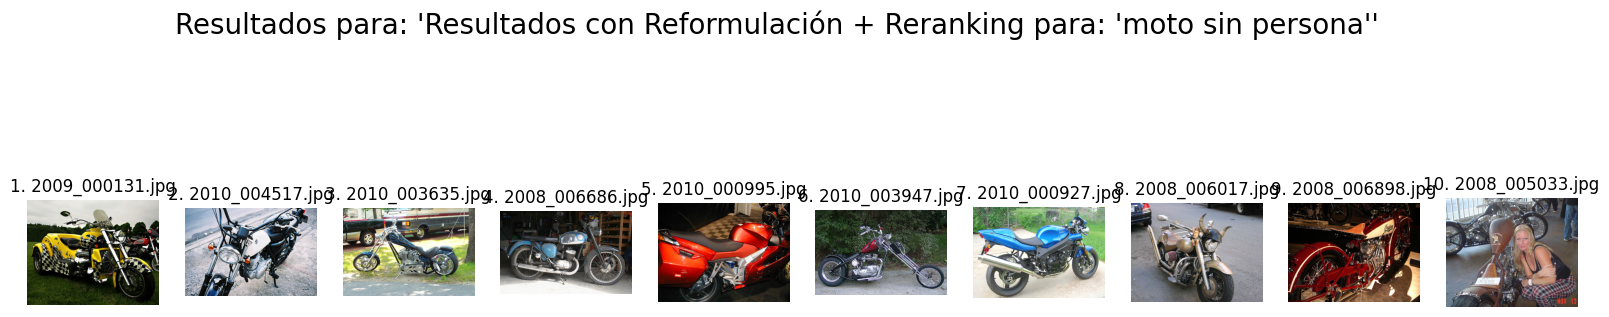

In [115]:
# Ejemplo 3
query_complex = "moto sin persona"

# Búsqueda Baseline
print(f"--- Ejecutando Baseline para: '{query_complex}' ---")
baseline_results = search_baseline(query_complex)
plot_results(baseline_results, f"Resultados Baseline para: '{query_complex}'")

# Búsqueda Avanzada (con reformulación y reranking)
print(f"\n--- Ejecutando Búsqueda Avanzada para: '{query_complex}' ---")
advanced_results = search_advanced(query_complex)
plot_results(advanced_results, f"Resultados con Reformulación + Reranking para: '{query_complex}'")

# Evaluación de Resultados

## Métricas

Se definen las métricas utilizadas para evaluar el rendimiento del sistema de búsqueda:
- **AP@K (Average Precision):** evalúa la calidad del ranking considerando la posición de las imágenes relevantes.  
- **Precision@K:** mide la proporción de resultados relevantes dentro de las primeras K imágenes.  
- **Recall@K:** indica la proporción de imágenes relevantes recuperadas.  
- **F1@K:** combina precisión y recall en una medida balanceada. 

In [39]:
from collections import defaultdict
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from tqdm import tqdm

In [41]:
# Calcula la Precisión
def precision_at_k(retrieved, relevant, k):
    retrieved_at_k = retrieved[:k]
    relevant_set = set(relevant)
    if not relevant_set: return 0.0
    hits = sum(1 for doc_id in retrieved_at_k if doc_id in relevant_set)
    return hits / k

# Calcula el Recall
def recall_at_k(retrieved, relevant, k):
    retrieved_at_k = retrieved[:k]
    relevant_set = set(relevant)
    if not relevant_set: return 0.0
    hits = sum(1 for doc_id in retrieved_at_k if doc_id in relevant_set)
    return hits / len(relevant_set)

# Calcula el F1-Score
def f1_score_at_k(retrieved, relevant, k):
    p = precision_at_k(retrieved, relevant, k)
    r = recall_at_k(retrieved, relevant, k)
    if (p + r) == 0: return 0.0
    return 2 * (p * r) / (p + r)

# Calcula la Precisión Media
def average_precision_at_k(retrieved, relevant, k):
    retrieved_at_k = retrieved[:k]
    relevant_set = set(relevant)
    if not relevant_set: return 0.0
    hits = 0
    precision_sum = 0.0
    for i, doc_id in enumerate(retrieved_at_k):
        if doc_id in relevant_set:
            hits += 1
            precision_sum += hits / (i + 1)
    return precision_sum / min(len(relevant_set), k)

#### Consultas simples

Se evalúa el rendimiento de los sistemas Baseline y Avanzado utilizando solo las primeras 10 imágenes recuperadas por cada consulta. Primero normaliza los nombres de archivo y elimina duplicados. Luego, para cada clase del dataset, calcula las métricas de precisión promedio (AP), precisión (Precision), cobertura (Recall) y F1-score, tanto para el modelo Baseline como para el Avanzado. Finalmente, almacena los resultados por clase y acumula los valores para calcular promedios globales. El objetivo es medir la calidad del ranking en las primeras posiciones, donde se observan mejor las diferencias entre los dos sistemas.

In [117]:
K = 10

def normalize_ids(seq):
    seen = set(); out = []
    for p in seq:
        f = os.path.basename(p)
        if f not in seen:
            out.append(f); seen.add(f)
    return out

print(f"\nGround Truth creado para {len(ground_truth_simple)} clases.")
print(f"Universo de evaluación (K): {K}")


per_class_rows = []
baseline_scores = {"AP@10": [], "Prec@10": [], "Rec@10": [], "F1@10": []}
advanced_scores = {"AP@10": [], "Prec@10": [], "Rec@10": [], "F1@10": []}

for class_name, relevant_docs in tqdm(ground_truth_simple.items(), desc="Evaluando consultas simples"):
    if not relevant_docs:
        continue

    query = f"a photo of a {class_name}"

    # Recuperación completa y normalización/deduplicación
    rb = normalize_ids(search_baseline(query,  top_k=K))
    ra = normalize_ids(search_advanced(query, top_k=K))

    # k efectivo 
    kb = len(rb)
    ka = len(ra)

    # Métricas Baseline 
    ap_b   = average_precision_at_k(rb, relevant_docs, k=kb)
    prec_b = precision_at_k(rb,        relevant_docs, k=kb)
    rec_b  = recall_at_k(rb,           relevant_docs, k=kb)
    f1_b   = f1_score_at_k(rb,         relevant_docs, k=kb)

    # Métricas Avanzado 
    ap_a   = average_precision_at_k(ra, relevant_docs, k=ka)
    prec_a = precision_at_k(ra,        relevant_docs, k=ka)
    rec_a  = recall_at_k(ra,           relevant_docs, k=ka)
    f1_a   = f1_score_at_k(ra,         relevant_docs, k=ka)

    # Acumular promedios macro
    baseline_scores["AP@10"].append(ap_b)
    baseline_scores["Prec@10"].append(prec_b)
    baseline_scores["Rec@10"].append(rec_b)
    baseline_scores["F1@10"].append(f1_b)

    advanced_scores["AP@10"].append(ap_a)
    advanced_scores["Prec@10"].append(prec_a)
    advanced_scores["Rec@10"].append(rec_a)
    advanced_scores["F1@10"].append(f1_a)

    # Fila por clase
    per_class_rows.append({
        "Clase": class_name,
        "AP@10Baseline":   ap_b,   "AP@10Avanzado":   ap_a,   
        "Prec@10Baseline": prec_b, "Prec@10Avanzado": prec_a, 
        "Rec@10Baseline":  rec_b,  "Rec@10Avanzado":  rec_a, 
        "F1@10Baseline":   f1_b,   "F1@10Avanzado":   f1_a   
    })


Ground Truth creado para 20 clases.
Universo de evaluación (K): 10


Evaluando consultas simples:   5%|▌         | 1/20 [00:03<01:02,  3.27s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  10%|█         | 2/20 [00:06<00:59,  3.31s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  15%|█▌        | 3/20 [00:10<00:58,  3.42s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  20%|██        | 4/20 [00:13<00:55,  3.44s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  25%|██▌       | 5/20 [00:16<00:51,  3.41s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  30%|███       | 6/20 [00:20<00:47,  3.42s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  35%|███▌      | 7/20 [00:23<00:44,  3.43s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  40%|████      | 8/20 [00:27<00:40,  3.41s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  45%|████▌     | 9/20 [00:30<00:37,  3.39s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  50%|█████     | 10/20 [00:33<00:33,  3.34s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  55%|█████▌    | 11/20 [00:37<00:30,  3.41s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  60%|██████    | 12/20 [00:40<00:27,  3.40s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  65%|██████▌   | 13/20 [00:44<00:24,  3.46s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  70%|███████   | 14/20 [00:47<00:20,  3.50s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  75%|███████▌  | 15/20 [00:51<00:17,  3.48s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  80%|████████  | 16/20 [00:54<00:13,  3.44s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  85%|████████▌ | 17/20 [00:57<00:10,  3.36s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  90%|█████████ | 18/20 [01:01<00:06,  3.33s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples:  95%|█████████▌| 19/20 [01:04<00:03,  3.36s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas simples: 100%|██████████| 20/20 [01:07<00:00,  3.40s/it]

Consulta sin negación, devolviendo resultados directos.


In [118]:
# Tabla por clase
if per_class_rows:
    df_per_class = (
        pd.DataFrame(per_class_rows)
        
    )
    print(df_per_class.head(20).to_markdown(index=False, floatfmt=".4f"))

| Clase       |   AP@10Baseline |   AP@10Avanzado |   Prec@10Baseline |   Prec@10Avanzado |   Rec@10Baseline |   Rec@10Avanzado |   F1@10Baseline |   F1@10Avanzado |
|:------------|----------------:|----------------:|------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|
| person      |          1.0000 |          0.8900 |            1.0000 |            0.9000 |           0.0010 |           0.0009 |          0.0021 |          0.0019 |
| sofa        |          1.0000 |          1.0000 |            1.0000 |            1.0000 |           0.0135 |           0.0135 |          0.0266 |          0.0266 |
| bottle      |          1.0000 |          1.0000 |            1.0000 |            1.0000 |           0.0123 |           0.0123 |          0.0243 |          0.0243 |
| tvmonitor   |          1.0000 |          1.0000 |            1.0000 |            1.0000 |           0.0155 |           0.0155 |          0.0305 |          0.0305 |
| ca

In [119]:
# Promedios globales
def macro_mean(d):
    return {k: (float(np.mean(v)) if v else 0.0) for k, v in d.items()}

baseline_macro  = macro_mean(baseline_scores)
advanced_macro  = macro_mean(advanced_scores)

print(f"| Métrica    | Baseline | Avanzado |   Δ (A - B) |")
print(f"|------------|:--------:|:--------:|:-----------:|")
for m in ["AP@10", "Prec@10", "Rec@10", "F1@10"]:
    b = baseline_macro[m]; a = advanced_macro[m]
    print(f"| {m:10} |  {b:.4f}  | {a:.4f}   | {a - b:+.4f}     |")

| Métrica    | Baseline | Avanzado |   Δ (A - B) |
|------------|:--------:|:--------:|:-----------:|
| AP@10      |  0.9786  | 0.9528   | -0.0259     |
| Prec@10    |  0.9900  | 0.9700   | -0.0200     |
| Rec@10     |  0.0147  | 0.0145   | -0.0003     |
| F1@10      |  0.0290  | 0.0284   | -0.0005     |


#### Consultas complejos

Se definió un conjunto de consultas complejas que combinan negaciones, atributos y relaciones entre objetos (por ejemplo, “un auto no rojo” o “un gato junto con un perro negro”). Estas consultas fueron utilizadas como ground truth manual para medir el desempeño de los sistemas Baseline y Avanzado bajo condiciones semánticamente más exigentes.

Para ello, se construye el conjunto "ground_truth_complex", que asocia a cada consulta una lista de imágenes consideradas relevantes según el significado esperado. Esto permite contar con una referencia para evaluar cuántas imágenes recuperadas por cada modelo son realmente correctas, luego, se realiza el cálculo de métricas de desempeño sobre el top-K (en este caso, K=10). Finalmente, se calculan los promedios globales y se presentan los resultados en tablas.

In [120]:
ground_truth_complex = {
    "un auto no rojo": [
        '2009_003360.jpg', '2010_004459.jpg','2010_005891.jpg', '2011_002826.jpg', '2007_005360.jpg', 
        '2010_000160.jpg', '2007_005978.jpg', '2009_003053.jpg', '2010_004877.jpg', 
        '2007_009436.jpg'
    ],
    "un barco no rojo": [
        '2007_002403.jpg', '2009_003511.jpg', '2008_005321.jpg', '2009_003136.jpg',
        '2008_001013.jpg', '2010_004576.jpg','2011_002943.jpg', '2010_001126.jpg',
        '2008_000120.jpg', '2008_003701.jpg'
    ],
    "un gato junto con un perro negro": [
        '2009_003098.jpg', '2009_004425.jpg', '2008_006817.jpg', '2008_005979.jpg',
        '2010_004327.jpg', '2007_009897.jpg', '2010_002067.jpg', '2010_005331.jpg',
        '2008_005181.jpg', '2010_005614.jpg'
    ],
    "a non-black cat": [
    '2010_005508.jpg', '2010_005115.jpg', '2010_005652.jpg', '2007_002445.jpg',
    '2011_001292.jpg', '2010_001240.jpg', '2010_005456.jpg', '2008_007082.jpg',
     '2010_001021.jpg'
    ]
}

In [121]:
K = 10  

def normalize_ids(seq):
    seen = set(); out = []
    for p in seq:
        f = os.path.basename(p)
        if f not in seen:
            out.append(f); seen.add(f)
    return out

results_list = []
per_query_rows = []

for query_to_eval, relevant_docs in tqdm(ground_truth_complex.items(), desc=f"Evaluando consultas complejas (top-{K})"):
    if not relevant_docs:
        continue

    # Recuperación y normalización
    baseline = normalize_ids(search_baseline(query_to_eval, top_k=K))
    advanced = normalize_ids(search_advanced(query_to_eval, top_k=K))

    # --- AP@K (usa el orden del ranking) ---
    ap_b = average_precision_at_k(baseline, relevant_docs, k=K)
    ap_a = average_precision_at_k(advanced, relevant_docs, k=K)

    # --- Prec/Rec/F1@K ---
    p_b  = precision_at_k(baseline, relevant_docs, k=K)
    p_a  = precision_at_k(advanced, relevant_docs, k=K)

    r_b  = recall_at_k(baseline, relevant_docs, k=K)
    r_a  = recall_at_k(advanced, relevant_docs, k=K)

    f1_b = f1_score_at_k(baseline, relevant_docs, k=K)
    f1_a = f1_score_at_k(advanced, relevant_docs, k=K)

    # Guardar formato estilo "consultas simples"
    per_query_rows.append({
        "Consulta": query_to_eval,
        "APBaseline": ap_b, "APAvanzado": ap_a, 
        "PrecBaseline": p_b, "PrecAvanzado": p_a, 
        "RecBaseline": r_b, "RecAvanzado": r_a, 
        "F1Baseline": f1_b, "F1Avanzado": f1_a
    })

# Promedios globales (macro sobre consultas)
def macro_mean(rows, base_key, adv_key):
    b = np.mean([row[base_key] for row in rows]) if rows else 0.0
    a = np.mean([row[adv_key]  for row in rows]) if rows else 0.0
    return float(b), float(a), float(a - b)

ap_b, ap_a, ap_delta   = macro_mean(per_query_rows, "APBaseline",   "APAvanzado")
pr_b, pr_a, pr_delta   = macro_mean(per_query_rows, "PrecBaseline", "PrecAvanzado")
rc_b, rc_a, rc_delta   = macro_mean(per_query_rows, "RecBaseline",  "RecAvanzado")
f1_b, f1_a, f1_delta   = macro_mean(per_query_rows, "F1Baseline",   "F1Avanzado")

Evaluando consultas complejas (top-10):  25%|██▌       | 1/4 [00:03<00:11,  3.73s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'red'


Evaluando consultas complejas (top-10):  50%|█████     | 2/4 [00:07<00:07,  3.70s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'red'


Evaluando consultas complejas (top-10):  75%|███████▌  | 3/4 [00:11<00:03,  3.71s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Evaluando consultas complejas (top-10): 100%|██████████| 4/4 [00:13<00:00,  3.39s/it]

Aplicando reranking: penalizando el término 'black'


In [122]:
# Tabla por consulta
df_queries = pd.DataFrame(per_query_rows)
print(f"\nResumen por consulta (ordenado por ΔAP{K}):")
print(df_queries.to_markdown(index=False, floatfmt=".4f"))


Resumen por consulta (ordenado por ΔAP10):
| Consulta                         |   APBaseline |   APAvanzado |   PrecBaseline |   PrecAvanzado |   RecBaseline |   RecAvanzado |   F1Baseline |   F1Avanzado |
|:---------------------------------|-------------:|-------------:|---------------:|---------------:|--------------:|--------------:|-------------:|-------------:|
| un auto no rojo                  |       0.0000 |       0.1619 |         0.0000 |         0.3000 |        0.0000 |        0.3000 |       0.0000 |       0.3000 |
| un barco no rojo                 |       0.0100 |       0.9000 |         0.1000 |         0.9000 |        0.1000 |        0.9000 |       0.1000 |       0.9000 |
| un gato junto con un perro negro |       0.3071 |       0.2095 |         0.4000 |         0.4000 |        0.4000 |        0.4000 |       0.4000 |       0.4000 |
| a non-black cat                  |       0.0123 |       0.1296 |         0.1000 |         0.2000 |        0.1111 |        0.2222 |       0.

In [123]:
# Promedios globales
print(f"| Métrica | Baseline | Avanzado |  Δ (A - B) |")
print(f"|---------|:--------:|:--------:|:----------:|")
print(f"| AP@{K:<2}   | {ap_b:.4f}   |{ap_a:.4f}    | {ap_delta:+.4f}    |")
print(f"| Prec@{K:<2} | {pr_b:.4f}   |{pr_a:.4f}    | {pr_delta:+.4f}    |")
print(f"| Rec@{K:<2}  | {rc_b:.4f}   |{rc_a:.4f}    | {rc_delta:+.4f}    |")
print(f"| F1@{K:<2}   | {f1_b:.4f}   |{f1_a:.4f}    | {f1_delta:+.4f}    |")


| Métrica | Baseline | Avanzado |  Δ (A - B) |
|---------|:--------:|:--------:|:----------:|
| AP@10   | 0.0824   |0.3503    | +0.2679    |
| Prec@10 | 0.1500   |0.4500    | +0.3000    |
| Rec@10  | 0.1528   |0.4556    | +0.3028    |
| F1@10   | 0.1513   |0.4526    | +0.3013    |


## Generación CSV

Se procesa un archivo CSV con consultas y se generan predicciones automáticas para cada una. Primero, se carga el archivo questions.csv y, por cada consulta, se aplica la función search_advanced para obtener las 10 imágenes más relevantes. Luego, los resultados se formatean según el formato requerido por Kaggle y se guardan en un nuevo archivo llamado submission.csv, que contiene los identificadores de consulta (qid) junto con los resultados predichos:

In [37]:
questions_file = '/kaggle/input/questions/questions.csv'

try:
    df_questions = pd.read_csv(questions_file)
    print(f"Archivo '{questions_file}' cargado con éxito. Procesando {len(df_questions)} consultas...")
except FileNotFoundError:
    print(f"ERROR: No se pudo encontrar el archivo en la ruta '{questions_file}'.")
    
if 'df_questions' in locals():
    results_for_csv = [] 

    for idx, row in tqdm(df_questions.iterrows(), total=df_questions.shape[0], desc="Generando predicciones"):
        qid = row['qid']
        query_text = row['query']
        
        advanced_results = search_advanced(query_text, top_k=10)
        
        image_ids = [filename.replace('.jpg', '') for filename in advanced_results]
        preds_string = ";".join(image_ids)
        
        results_for_csv.append({
            "qid": qid,
            "preds": preds_string
        })

    # Creación del Archivo CSV
    df_submission = pd.DataFrame(results_for_csv)
    
    submission_filename = 'submission.csv'
    df_submission.to_csv(submission_filename, index=False)

    print(f"\n¡Archivo '{submission_filename}' generado con éxito!")
    print("Previsualización de la entrega:")
    print(df_submission.head())

else:
    print("ERROR: El DataFrame 'df_questions' no está cargado.")
    print("Asegúrate de haber cargado 'questions.csv' en una celda anterior.")

Archivo '/kaggle/input/questions/questions.csv' cargado con éxito. Procesando 40 consultas...


Generando predicciones:   2%|▎         | 1/40 [00:03<02:16,  3.49s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:   5%|▌         | 2/40 [00:07<02:13,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:   8%|▊         | 3/40 [00:10<02:09,  3.50s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  10%|█         | 4/40 [00:14<02:06,  3.51s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  12%|█▎        | 5/40 [00:17<02:03,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  15%|█▌        | 6/40 [00:21<01:59,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  18%|█▊        | 7/40 [00:24<01:55,  3.50s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  20%|██        | 8/40 [00:28<01:52,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  22%|██▎       | 9/40 [00:31<01:49,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  25%|██▌       | 10/40 [00:35<01:45,  3.53s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  28%|██▊       | 11/40 [00:38<01:42,  3.54s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  30%|███       | 12/40 [00:42<01:38,  3.53s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  32%|███▎      | 13/40 [00:45<01:35,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  35%|███▌      | 14/40 [00:49<01:31,  3.53s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  38%|███▊      | 15/40 [00:52<01:27,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  40%|████      | 16/40 [00:56<01:24,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  42%|████▎     | 17/40 [00:59<01:21,  3.53s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  45%|████▌     | 18/40 [01:03<01:17,  3.52s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  48%|████▊     | 19/40 [01:06<01:13,  3.51s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  50%|█████     | 20/40 [01:10<01:10,  3.53s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  52%|█████▎    | 21/40 [01:13<01:07,  3.53s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  55%|█████▌    | 22/40 [01:17<01:04,  3.57s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'glasses'


Generando predicciones:  57%|█████▊    | 23/40 [01:21<01:00,  3.57s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  60%|██████    | 24/40 [01:24<00:57,  3.59s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'people'


Generando predicciones:  62%|██████▎   | 25/40 [01:28<00:54,  3.61s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'flying'


Generando predicciones:  65%|██████▌   | 26/40 [01:32<00:50,  3.59s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  68%|██████▊   | 27/40 [01:35<00:46,  3.59s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  70%|███████   | 28/40 [01:39<00:43,  3.61s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'tree'


Generando predicciones:  72%|███████▎  | 29/40 [01:42<00:39,  3.58s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  75%|███████▌  | 30/40 [01:45<00:32,  3.28s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'non-red car'


Generando predicciones:  78%|███████▊  | 31/40 [01:49<00:30,  3.38s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  80%|████████  | 32/40 [01:52<00:27,  3.46s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  82%|████████▎ | 33/40 [01:56<00:24,  3.47s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  85%|████████▌ | 34/40 [01:59<00:20,  3.50s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  88%|████████▊ | 35/40 [02:03<00:17,  3.53s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'in'


Generando predicciones:  90%|█████████ | 36/40 [02:06<00:14,  3.55s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  92%|█████████▎| 37/40 [02:10<00:10,  3.55s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  95%|█████████▌| 38/40 [02:13<00:07,  3.53s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Consulta sin negación, devolviendo resultados directos.


Generando predicciones:  98%|█████████▊| 39/40 [02:17<00:03,  3.56s/it]The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Aplicando reranking: penalizando el término 'rider'


Generando predicciones: 100%|██████████| 40/40 [02:21<00:00,  3.53s/it]

Aplicando reranking: penalizando el término 'red'

¡Archivo 'submission.csv' generado con éxito!
Previsualización de la entrega:
  qid                                              preds
0  q1  2010_002684;2011_000872;2010_005877;2010_00098...
1  q2  2010_000113;2008_008724;2009_001480;2008_00535...
2  q3  2010_002740;2008_008354;2010_004252;2009_00316...
3  q4  2010_004253;2008_005321;2007_001698;2010_00420...
4  q5  2009_004542;2009_001059;2010_001463;2009_00046...
